In [3]:
import pandas as pd

# Load the final DataFrame from the saved CSV
try:
    df_final = pd.read_csv('../data/Processed/df_final.csv')
    print("DataFrame 'df_final' cargado exitosamente.")
except FileNotFoundError:
    print("Error: El archivo 'df_final.csv' no se encontró. Asegúrate de haberlo guardado en la carpeta correcta.")


DataFrame 'df_final' cargado exitosamente.


In [4]:
# El método .isnull() devuelve True para los valores nulos, y .sum() los cuenta
print("Conteo de valores vacíos por columna:")
print(df_final.isnull().sum())

Conteo de valores vacíos por columna:
user_id                   0
age                       0
country                   0
subscription_type         0
registration_date         0
total_watch_time_hours    0
session_id                0
content_id                0
watch_date                0
watch_duration_minutes    0
completion_percentage     0
device_type               0
quality_level             0
title                     0
genre                     0
duration_minutes          0
release_year              0
rating                    0
views_count               0
production_budget         0
seasons                   0
episodes_per_season       0
avg_episode_duration      0
total_views               0
dtype: int64


### Central tendency and dispersion measures calculation

In [5]:
numeric_vars = ['age', 'watch_duration_minutes', 'completion_percentage', 'total_watch_time_hours']

# Calcular las medidas de tendencia central
print("--- Medidas de Tendencia Central ---")
print("Media:")
print(df_final[numeric_vars].mean())
print("\nMediana:")
print(df_final[numeric_vars].median())
print("\nModa:")
print(df_final[numeric_vars].mode().iloc[0]) # .iloc[0] para mostrar el primer valor si hay múltiples modas

# Calcular las medidas de dispersión
print("\n--- Medidas de Dispersión ---")
print("Varianza:")
print(df_final[numeric_vars].var())
print("\nDesviación Estándar:")
print(df_final[numeric_vars].std())
print("\nRangos:")
print(df_final[numeric_vars].max() - df_final[numeric_vars].min())

--- Medidas de Tendencia Central ---
Media:
age                        41.538551
watch_duration_minutes     78.907871
completion_percentage      78.384990
total_watch_time_hours    352.365682
dtype: float64

Mediana:
age                        42.0
watch_duration_minutes     79.0
completion_percentage      84.5
total_watch_time_hours    324.1
dtype: float64

Moda:
age                        62.0
watch_duration_minutes     23.0
completion_percentage     100.0
total_watch_time_hours    438.7
Name: 0, dtype: float64

--- Medidas de Dispersión ---
Varianza:
age                         195.049335
watch_duration_minutes     2025.638780
completion_percentage       460.649707
total_watch_time_hours    53911.288195
dtype: float64

Desviación Estándar:
age                        13.966006
watch_duration_minutes     45.007097
completion_percentage      21.462752
total_watch_time_hours    232.188045
dtype: float64

Rangos:
age                         47.0
watch_duration_minutes     178.0
completio

### Outlier detection and pattern identification

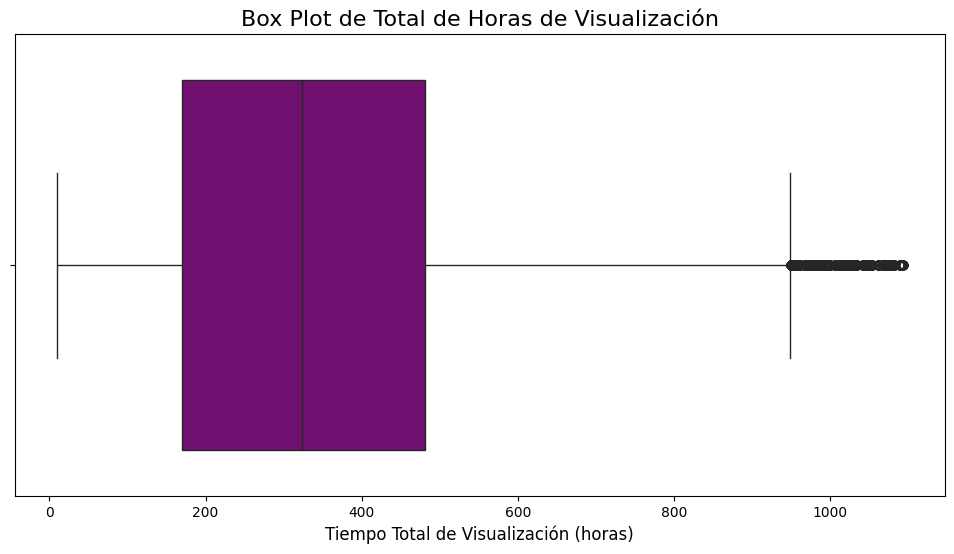

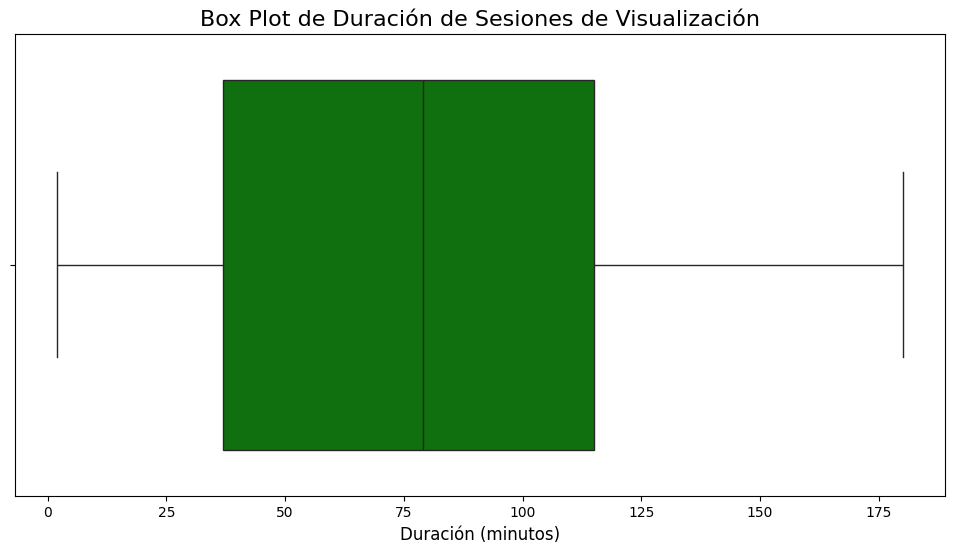

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
# Box plot para total_watch_time_hours
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_final['total_watch_time_hours'], color='purple')
plt.title('Box Plot de Total de Horas de Visualización', fontsize=16)
plt.xlabel('Tiempo Total de Visualización (horas)', fontsize=12)
plt.show()

# Box plot para watch_duration_minutes
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_final['watch_duration_minutes'], color='green')
plt.title('Box Plot de Duración de Sesiones de Visualización', fontsize=16)
plt.xlabel('Duración (minutos)', fontsize=12)
plt.show()

* Total Watch Time: these outliers represent a small segment of "super-users" who have accumulated an exceptionally high number of viewing hours compared to the rest of the user base.
* Watch Duration: The box plot for watch duration, on the other hand, shows a much tighter distribution with no significant outliers. This tells you that while the length of a single viewing session varies, it generally stays within an expected range, without any extremely long or short sessions that are out of the ordinary.

### Prueba de Hipótesis: Usuarios Premium vs. Básicos

In [7]:
from scipy import stats

premium_users = df_final[df_final['subscription_type'] == 'Premium']['total_watch_time_hours']
basic_users = df_final[df_final['subscription_type'] == 'Basic']['total_watch_time_hours']

# Realizar la prueba t de Student
t_stat, p_value = stats.ttest_ind(premium_users, basic_users, equal_var=False)

print("\n--- Resultados de la Prueba t de Student (Premium vs. Basic) ---")
print(f"Estadístico t: {t_stat:.2f}")
print(f"Valor p: {p_value:.3f}")

if p_value < 0.05:
    print("Conclusión: La diferencia en el tiempo de visualización es estadísticamente significativa.")
else:
    print("Conclusión: No hay una diferencia estadísticamente significativa en el tiempo de visualización.")


--- Resultados de la Prueba t de Student (Premium vs. Basic) ---
Estadístico t: 206.44
Valor p: 0.000
Conclusión: La diferencia en el tiempo de visualización es estadísticamente significativa.


La diferencia en el tiempo de visualización es estadísticamente significativa. Esto te permite afirmar con confianza que los usuarios Premium ven más contenido que los usuarios Básicos.

### Correlation analysis between variables

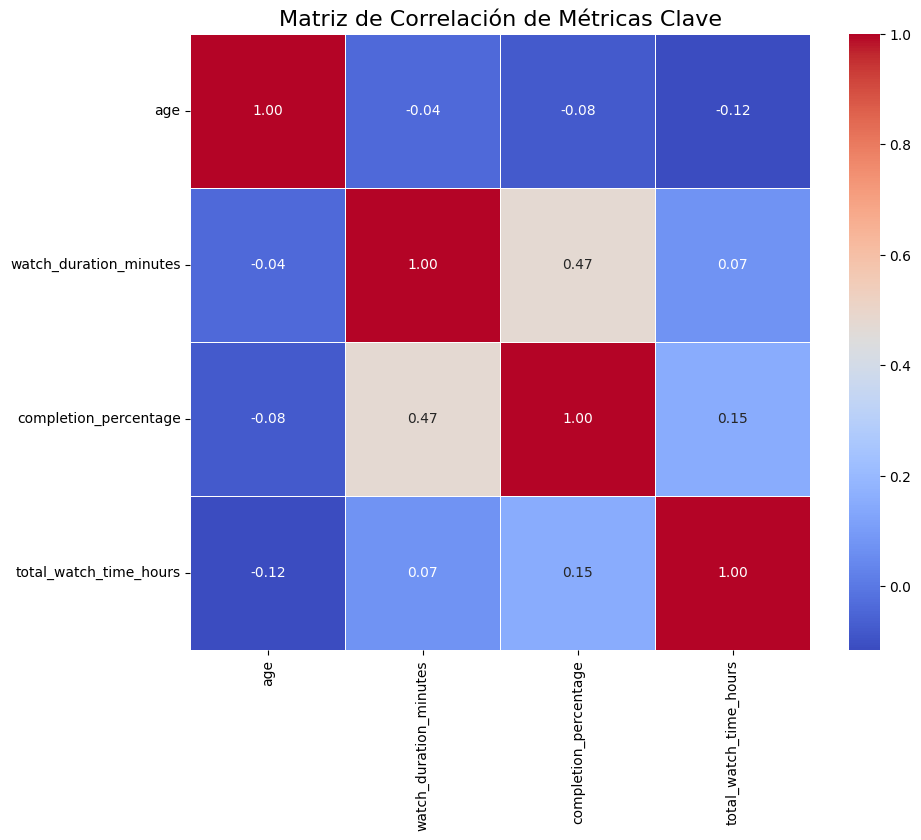


Matriz de Correlación:
                             age  watch_duration_minutes  \
age                     1.000000               -0.037797   
watch_duration_minutes -0.037797                1.000000   
completion_percentage  -0.078440                0.473724   
total_watch_time_hours -0.115300                0.074354   

                        completion_percentage  total_watch_time_hours  
age                                 -0.078440               -0.115300  
watch_duration_minutes               0.473724                0.074354  
completion_percentage                1.000000                0.154132  
total_watch_time_hours               0.154132                1.000000  


In [8]:
correlation_matrix = df_final[numeric_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Métricas Clave', fontsize=16)
plt.show()

print("\nMatriz de Correlación:")
print(correlation_matrix)

1. (watch_duration_minutes) vs (completion_percentage): El valor es 0.47. Esta es una correlación positiva moderada. Esto tiene sentido intuitivo: los usuarios que ven sesiones más largas tienden a tener un mayor porcentaje de finalización de ese contenido.
2. (total_watch_time_hours) vs. Otras Métricas: la correlación es debil entonces el tiempo total de visualización no depende fuertemente de la duración de una sola sesión o del porcentaje de finalización

### User segmentation using clustering algorithms

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [20]:
features = ['watch_duration_minutes', 'completion_percentage', 'total_watch_time_hours']
X = df_final[features]

In [21]:
# Normalizamos las variables.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

--- Tabla de WCSS por Número de Clústeres (k) ---
    k           WCSS
0   1  668355.000000
1   2  449323.936858
2   3  341410.584928
3   4  247045.771420
4   5  213517.764054
5   6  182709.525320
6   7  164237.738289
7   8  145244.889002
8   9  131209.685886
9  10  118574.027912

Análisis de la tabla:
Busca en la tabla el punto donde el valor de 'WCSS' deja de disminuir drásticamente.
En tu caso, puedes ver que el mayor 'salto' ocurre entre k=1 y k=3.
Después de k=3, la reducción es mucho menor. Por lo tanto, k=3 es el valor óptimo.


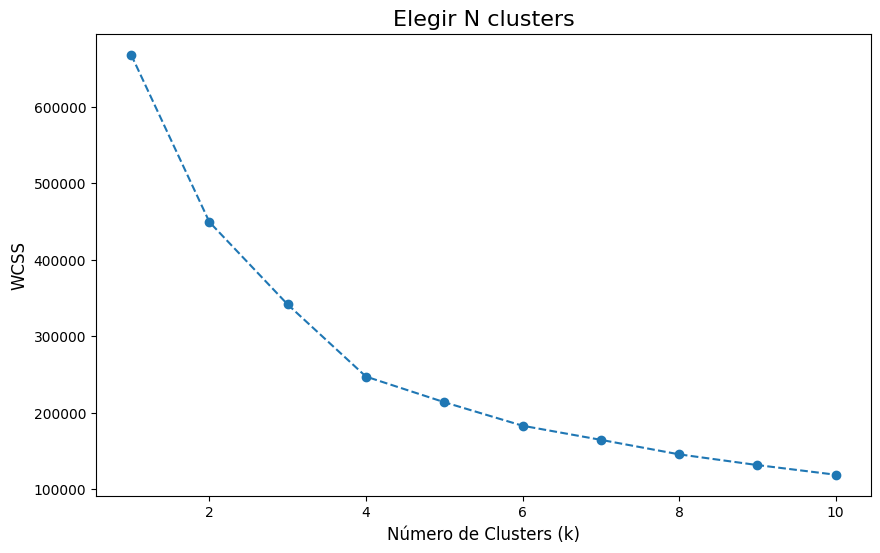

In [22]:
wcss = [] # suma de las distancias al cuadrado entre los puntos de datos y el centro de su clúster.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

    # --- Mostrar los resultados en una tabla ---
wcss_df = pd.DataFrame({'k': range(1, 11), 'WCSS': wcss})
print("--- Tabla de WCSS por Número de Clústeres (k) ---")
print(wcss_df)

    # --- Cómo interpretar la tabla ---
print("\nAnálisis de la tabla:")
print("Busca en la tabla el punto donde el valor de 'WCSS' deja de disminuir drásticamente.")
print("En tu caso, puedes ver que el mayor 'salto' ocurre entre k=1 y k=3.")
print("Después de k=3, la reducción es mucho menor. Por lo tanto, k=3 es el valor óptimo.")

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elegir N clusters', fontsize=16)
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.show()



In [23]:
optimal_k = 3
kmeans_model = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans_model.fit_predict(X_scaled)

In [24]:
df_final['cluster'] = clusters

print("Clustering completado. La nueva columna 'cluster' ha sido añadida al DataFrame.")

Clustering completado. La nueva columna 'cluster' ha sido añadida al DataFrame.


In [25]:
cluster_summary = df_final.groupby('cluster')[features].mean()
print("\n--- Perfil Promedio de Cada Clúster ---")
print(cluster_summary)


--- Perfil Promedio de Cada Clúster ---
         watch_duration_minutes  completion_percentage  total_watch_time_hours
cluster                                                                       
0                    123.717508              89.728708              333.130944
1                     49.701400              87.322267              461.117112
2                     45.092760              49.524295              247.281443


* Perfil del Clúster 0: Usuarios de Alto Compromiso con Sesiones Largas
    - Este segmento se caracteriza por consumir contenido de larga duración (como películas completas) y terminarlo. Aunque su tiempo total de visualización no es el más alto, son usuarios muy comprometidos en cada sesión.

* Perfil del Clúster 1: Usuarios de Alto Compromiso con Alta Frecuencia
    - A pesar de que sus sesiones individuales son cortas, su porcentaje de finalización es muy alto y su tiempo total de visualización es el más alto de todos. Este segmento corresponde a los "super-usuarios". Son usuarios que ven contenido corto, lo terminan, y regresan a la plataforma con mucha frecuencia.

* Perfil del Clúster 2: Usuarios de Bajo Compromiso
    - Los usuarios en este grupo ven sesiones cortas y no terminan la mitad de lo que empiezan. Representan una oportunidad para el negocio, ya que una estrategia para aumentar su compromiso podría traducirse en un mayor tiempo de visualización general.

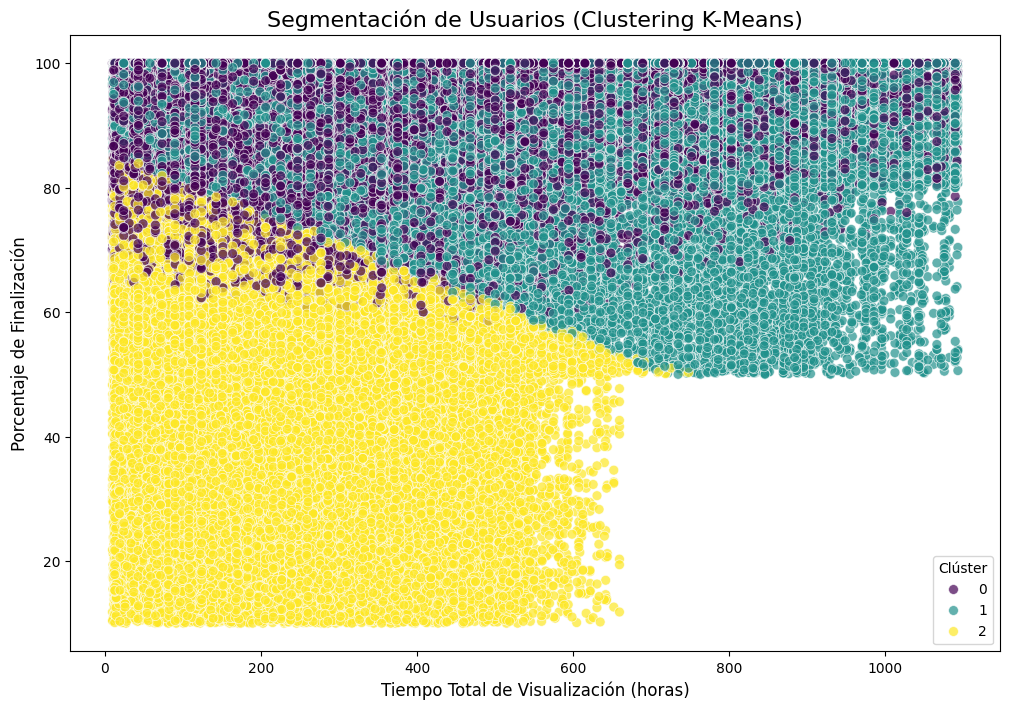

In [26]:
# Visualizar los clústeres en un gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='total_watch_time_hours',
    y='completion_percentage',
    hue='cluster',
    data=df_final,
    palette='viridis',
    s=50,
    alpha=0.7
)
plt.title('Segmentación de Usuarios (Clustering K-Means)', fontsize=16)
plt.xlabel('Tiempo Total de Visualización (horas)', fontsize=12)
plt.ylabel('Porcentaje de Finalización', fontsize=12)
plt.legend(title='Clúster')
plt.show()